# Data analysis group project: organising functions

## Importing librairies

In [1]:
#importing librairies
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_rel

## Creating all functions for data analysis

### Data collection

In [25]:
def data_collection(path):
    """collecting the dataframe from a folder"""
    return pd.read_csv(path)

### Data cleaning

In [2]:
def data_cleaning(df):
    """cleaning the data obtained"""
    df['Date']=df['dt_iso'].astype(str).str[:10]
    df["Date"]= pd.to_datetime(df['Date'])
    df['month'] = pd.DatetimeIndex(df['Date']).month
    df['year'] = pd.DatetimeIndex(df['Date']).year
    df["delta_T"] = df["temp_max"].subtract(df["temp_min"], fill_value=0)
    return df

#### 1. Checking that all delta are positive:

In [3]:
def checking_delta(df):
    return df.loc[(df['delta_T'] < 0)]

#### 2 .Cleaning the decade column

In [4]:
def todecade(y): 
    return str(y)[2] + '0'

In [5]:
def rename_decade(df):
    df.decade=df.decade.str.replace('70','1970').str.replace('80','1980').str.replace('90','1990').str.replace('00','2000').str.replace('10','2010').str.replace('20','2020')
    df.decade=df.decade.str.replace('202010','2010').str.replace('202000','2000')
    return df

#### 3. Creating a dataframe for the city chosen only

In [6]:
def df_city(city):
    if city == "Berlin":
        return df[df.city_name == 'Berlin']
    elif city == "Hotan":
        return df[df.city_name == 'Hotan Prefecture']
    elif city =="Milan":
        return df[df.city_name == 'Milan']
    elif city =="Dhaka":
        return df[df.city_name == 'Dhaka']
    elif city =="Szczecin":
        return df[df.city_name == 'Szczecin']

### Data analysis

#### Creating a dataframe grouped by decades

In [7]:
def temp_decade(dfcity):
    df = dfcity.groupby(['decade']).mean().reset_index().drop(5).drop(0)
    return df

#### Creating a dataframe grouped by years

In [46]:
def temp_year(dfcity):
    df = dfcity.groupby(['year']).mean().reset_index().drop(0)
    return df[:-1]

#### Creating a graph for average temp per year

In [51]:
#graph1b per year

def plot_av_temp_year(df_year):
    plot1b = df_year.plot(kind='line',x='year',y='temp', color=["darkorange"])
    
    if city=="Dhaka":
        plt.ylim([0, 30])
    else:
        plt.ylim([0, 15])
    plt.title(f"Average temperature per year for {city}")
    plt.xlabel('Yeat')
    plt.ylabel('Average temperature')
    plt.grid(b=None, which='major', axis='y')
    plt.show()
    return plot1b

#### Same graph but per decade

In [8]:
#graph1

def plot_av_temp(df_decade):
    plot1 = df_decade.plot(kind='line',x='decade',y='temp', color=["darkorange"])
    
    if city=="Dhaka":
        plt.ylim([0, 30])
    else:
        plt.ylim([0, 15])
    plt.title(f"Average temperature per decade for {city}")
    plt.xlabel('Decade')
    plt.ylabel('Average temperature')
    plt.grid(b=None, which='major', axis='y')
    plt.show()
    return plot1

#### Creating a dataframe per month and per decade

In [2]:
def temp_months_decade(dfcity):
    df=dfcity.groupby(['decade','month']).mean().reset_index()
    return df

#### Cleaning this dataframe to keep the columns decade and months

In [10]:
def df2_create(df_months_decade):
    df=df_months_decade.drop(columns=['dt','timezone','lat','lon','temp_min','temp_max','feels_like','pressure','sea_level','grnd_level','humidity','wind_speed','wind_deg','rain_1h','rain_3h','snow_1h','snow_3h','clouds_all','weather_id','year','delta_T']).reset_index(drop=True).set_index(['month'])
    return df

#### Creating a graph for average temperature per month & decade

In [12]:
#graph2

def plot_temp_month(df_graph2):
    fig, ax = plt.subplots(1,1,figsize=(10, 6))
    for i, (j, col) in enumerate(df_graph2.iteritems()):
        col = col.rename_axis([None, None])
        plot2=col.unstack(fill_value=0).plot(ax=ax, legend=False, color=["limegreen","green","orange","red"])
        if i == 0:
            ax.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    fig.tight_layout()
    plt.xlabel('Months')
    plt.ylabel('Average temperature')
    plt.grid(b=None, which='major', axis='y')
    st = plt.suptitle(f"Average temperature per month \n and per decade for {city}", fontsize=12)
    st.set_y(0.95)
    ax.set_ylim([-5, 32])
    fig.subplots_adjust(top=0.75)
    plt.show()
    return plot2

#### Creating a graph for the average delta (max-min temp) per decade

In [13]:
#graph3

def plot_delta(df_decade):
    plotdelta=df_decade.plot(kind='line',x='decade',y='delta_T', color="darkviolet")
    plt.title(f"Average delta per decade for {city}")
    plt.xlabel('Decade')
    plt.ylim([0, 7])
    plt.ylabel('Average temperature variation (delta T)')
    plt.grid(b=None, which='major', axis='y')
    plt.show()
    return plotdelta

#### Same graph but per year

In [54]:
#graph3 per year

def plot_delta_year(df_year):
    plotdelta=df_year.plot(kind='line',x='year',y='delta_T', color="darkviolet")
    plt.title(f"Average delta per year for {city}")
    plt.xlabel('Year')
    plt.ylim([0, 7])
    plt.ylabel('Average temperature variation (delta T)')
    plt.grid(b=None, which='major', axis='y')
    plt.show()
    return plotdelta

#### Creating a dataframe to keep only the average min and max temperature as a column

In [14]:
def df_plot3b(df_decade):
    df=df_decade.drop(columns=['dt','timezone','lat','lon','temp','feels_like','pressure','sea_level','grnd_level','humidity','wind_speed','wind_deg','rain_1h','rain_3h','snow_1h','snow_3h','clouds_all','weather_id','year','delta_T','month']).reset_index(drop=True).set_index(['decade'])
    return df

#### Creating a graph for average min/max temperatures per decades

In [15]:
#Graph 3b
def plot_max_min_temp(df_graph3b):
    fig, ax = plt.subplots(1,1, figsize=(6, 5))
    for i, (j, col) in enumerate(df_graph3b.iteritems()):
        col = col.rename_axis([None, None])
        plot3b=col.unstack(fill_value=0).plot(ax=ax, legend=False,color=['Darkred','blue'])          
        if i == 0:
            ax.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    plt.title(f"Average minimum and maximum temperature \n per decade for {city}")
    plt.xlabel('Decade')
    plt.ylabel('Temperature')
    plt.grid(b=None, which='major', axis='y')
    if (city == "Dhaka"):
        ax.set_ylim([20, 30])
    elif (city == "Hotan"):
        ax.set_ylim([-5, 20])
    else:
        ax.set_ylim([-7, 12])
    
    plt.show()
    return plot3b

#### Creating a dataframe to keep only the average min and max temperature as a column PER YEAR

In [60]:
def df_plot3b_year(df_year):
    df=df_year.drop(columns=['dt','timezone','lat','lon','temp','feels_like','pressure','sea_level','grnd_level','humidity','wind_speed','wind_deg','rain_1h','rain_3h','snow_1h','snow_3h','clouds_all','weather_id','delta_T','month']).reset_index(drop=True).set_index(['year'])
    return df

#### Same graph but per year

In [79]:
#Graph 3b
def plot_max_min_temp_year(df_graph3b):
    fig, ax = plt.subplots(1,1, figsize=(6, 5))
    for i, (j, col) in enumerate(df_graph3b.iteritems()):
        col = col.rename_axis([None, None])
        plot3b=col.unstack(fill_value=0).plot(ax=ax, legend=False,color=['Darkred','blue'])          
        if i == 0:
            ax.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    plt.title(f"Average minimum and maximum temperature \n per year for {city}")
    plt.xlabel('Year')
    plt.ylabel('Temperature')
    plt.grid(b=None, which='major', axis='y')
    if (city == "Dhaka"):
        ax.set_ylim([20, 30])
    elif (city == "Hotan"):
        ax.set_ylim([-5, 20])
    else:
        ax.set_ylim([-7, 12])
    
    plt.show()
    return plot3b

#### Creating a dataframe for the average temperature per decade and per month

In [16]:
def df_plot4(dfcity):
    df=dfcity.groupby(['decade','month']).mean().drop(columns=['dt','timezone','lat','lon','temp','feels_like','pressure','sea_level','grnd_level','humidity','wind_speed','wind_deg','rain_1h','rain_3h','snow_1h','snow_3h','clouds_all','weather_id','year','delta_T']).reset_index().set_index(['month'])
    return df

#### Creating a graph for the average temperature per decade and per month

In [17]:
#Graph4

def plot_max_min_month(df_graph4):
    fig, axes = plt.subplots(1, 4, figsize=(15, 4))
    for i, (j, col) in enumerate(df_graph4.iteritems()):
        ax = axes[i]
        col = col.rename_axis([None, None])
        plot4=col.unstack(fill_value=0).plot(ax=ax, title=j, legend=False, color=['Darkred','blue'])            
        ax.xaxis.set_major_locator(plt.MaxNLocator(13))
        if (city == "Dhaka")| (city =="Hotan"):
            ax.set_ylim([-5, 32])
        else:
            ax.set_ylim([-5, 25])
        ax.set_xlabel('Months')
        ax.set_ylabel('Temperature')
        ax.grid(b=None, which='major', axis='y')
        if i == 0:
            ax.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    fig.tight_layout()
    st = plt.suptitle(f'Average minimum and maximum temperature per month and per decade for {city}', fontsize="x-large")
    st.set_y(0.95)
    fig.subplots_adjust(top=0.75)
    plt.show()
    return plot4

#### Creating a dataframe for the average temperature of Jan, Feb, March for all decades + 2020

In [18]:
def df5(dfcity):
    """Checking covid impact on recent temperatures"""
    df=dfcity.groupby(['decade','month']).mean().reset_index().drop(columns=['dt','timezone','lat','lon','temp_min','temp_max','feels_like','pressure','sea_level','grnd_level','humidity','wind_speed','wind_deg','rain_1h','rain_3h','snow_1h','snow_3h','clouds_all','weather_id','year','delta_T'])
    return df.loc[(df.month == 1) | (df.month == 2) | (df.month == 3)]

#### Creating a graph for the average temperature of Jan, Feb, March for all decades + 2020

In [19]:
#Graph 5

def plot_impact_covid(df_graph5):
    fig, ax = plt.subplots(1,1,figsize=(7, 6))
    for i, (j, col) in enumerate(df_graph5.iteritems()):
        col = col.rename_axis([None, None])
        plot5=col.unstack(fill_value=0).plot(ax=ax, legend=False, color=["limegreen","green","orange","red", "black"])
        if i == 0:
            ax.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    fig.tight_layout()
    plt.xlabel('Months')
    plt.ylabel('Average temperature')
    plt.grid(b=None, which='major', axis='y')
    st=plt.suptitle(f"Average temperature per decade \n for January, February and March in {city}", fontsize=12)
    st.set_y(0.85)
    fig.subplots_adjust(top=0.75)
    plt.locator_params(axis='x', nbins=3)
    if (city == "Dhaka") | (city =="Hotan"):
        ax.set_ylim([-5, 30])
    else:
        ax.set_ylim([-5, 9])
    plt.show()
    return plot5

#### Creating a correlation matrix

In [20]:
def plot_correlation(dfcity_corr):
    plt.figure(figsize=(20, 20))
    p = sns.heatmap(dfcity_corr.corr(), annot=True, square=True)
    st=plt.suptitle(f"Correlation between temperature parameters for {city}", fontsize=16)
    st.set_y(0.85)
    plt.show()
    return p

### Saving all the graphs + the overall cleaned dataframe + the cleaned dataframe for the chosen city

In [21]:
def save_viz(barchart,title,path_output):
    """saving the graphs"""
    os.chdir(path_output)
    fig = barchart.get_figure()
    fig.savefig(title+ '.png')
    plt.show()

In [22]:
def save_clean_df(df,path_output):
    """saving the dataframe into a csv"""
    os.chdir(path_output)
    df.to_csv('Clean_meteo_dataframe.csv')

In [23]:
def save_clean_df_city(dfcity, path_output):
    """saving the dataframe into a csv"""
    os.chdir(path_output)
    dfcity.to_csv(f'Clean_meteo_dataframe for {city}.csv')

### Calling all functions: creating the dataframes and graphs defined by the functions

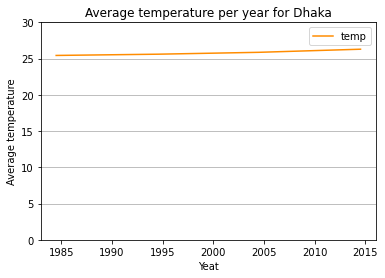

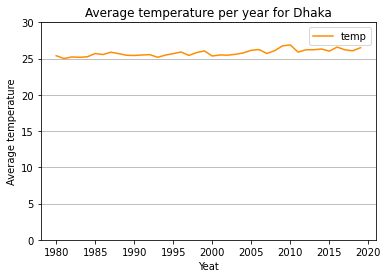

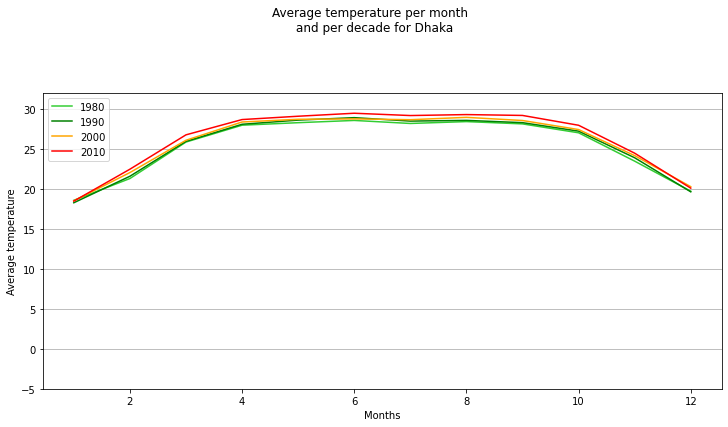

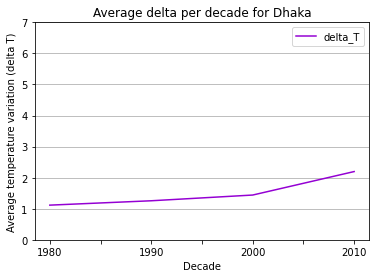

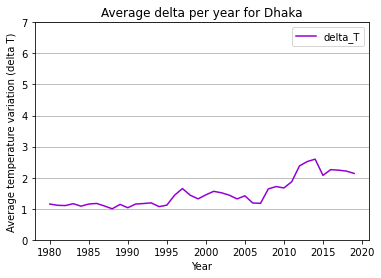

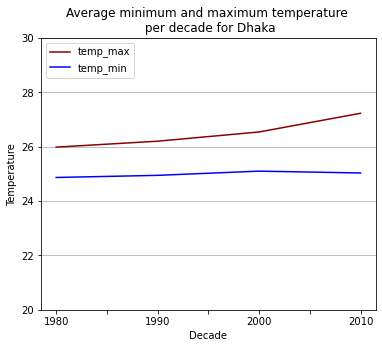

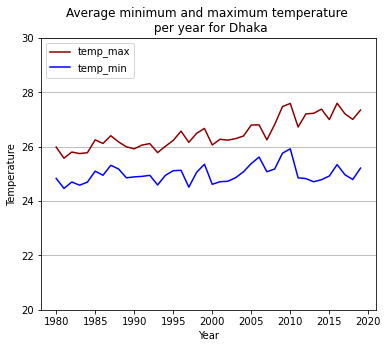

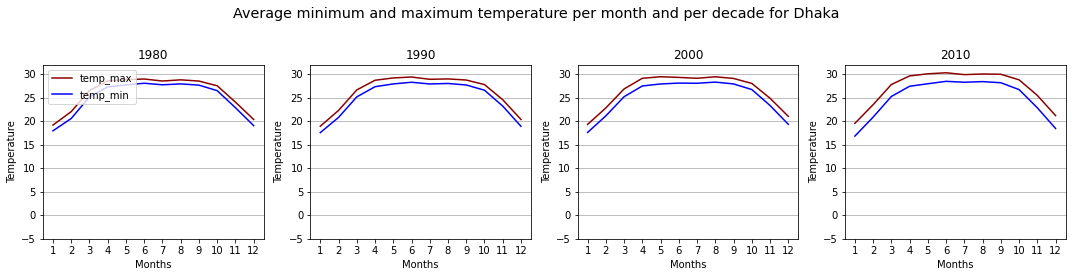

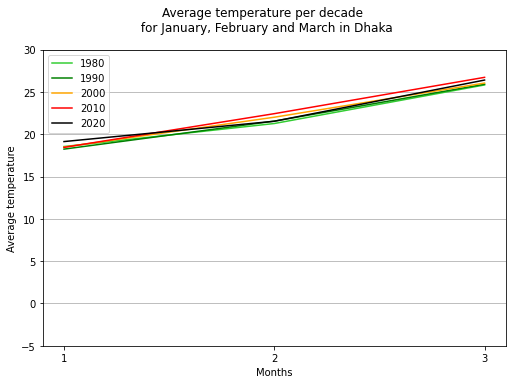

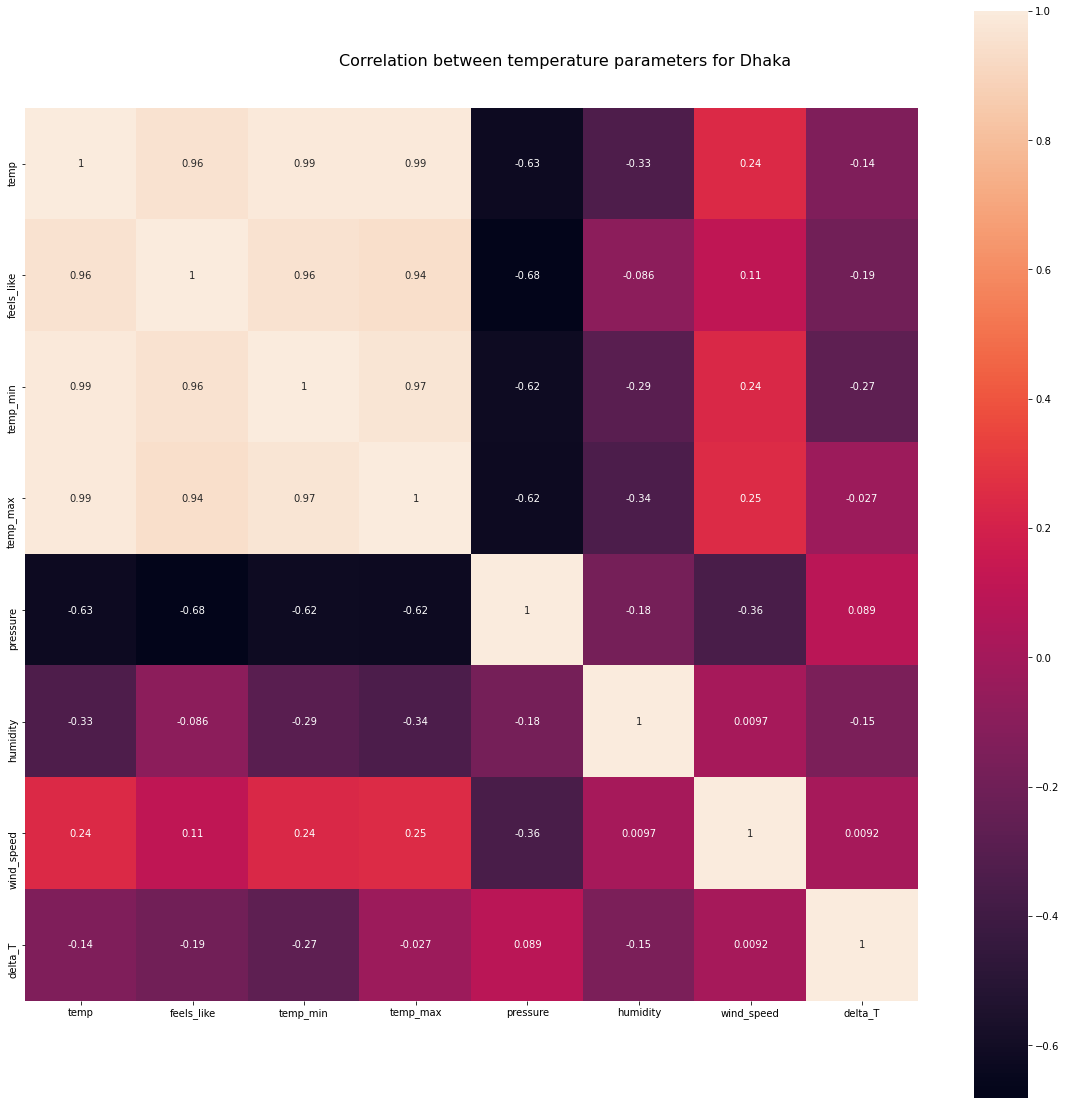

In [85]:
if __name__ == '__main__':
    
    #define where to get the csv and where to save the output:
    path='C:/Users/Camille/Documents/Ecole/Ironhack/Week 4/Group project/Data_weather.csv'
    path2='C:/Users/Camille/Documents/Ecole/Ironhack/Week 4/Group project/Data_weather2.csv'
    path_output='C:/Users/Camille/Documents/Ecole/Ironhack/Week 4/Group project/Output'
        
    #data cleaning
    df1=data_collection(path)
    df2=data_collection(path2)
    df=pd.concat([df1, df2])
    
    df=data_cleaning(df)
    data_cleaning(df)
    df["decade"] = df["year"].apply(todecade)
    df=rename_decade(df)
    
    #choose the city between Milan Berlin and Hotan + Dhaka, Szczecin (Poland)
    city="Dhaka"
    
    #data wrangling per city chosen
    dfcity=df_city(city)
    dfcity.reset_index(drop=True)
    
    #data analysis:
    
    #analysis of average temperature per decade
    df_decade=temp_decade(dfcity)
    plot1=plot_av_temp(df_decade)
    
    #analysis of average temperature per year 
    df_year=temp_year(dfcity)
    plot1b=plot_av_temp_year(df_year)
    
    #average temperature per month per decade
    df_months_decade=temp_months_decade(dfcity)
    df2=df2_create(df_months_decade)
    df_graph2=pd.pivot_table(df2, values=['temp'], index=['decade'],columns=['month','decade'], aggfunc=np.mean, fill_value=0).T.reset_index().set_index(["month","level_0"]).drop(columns=["1970","2020"])
    df_graph2["value"]=df_graph2["1980"]+df_graph2["1990"]+df_graph2["2000"]+df_graph2["2010"]
    df_graph2=df_graph2.drop(columns=["1980","1990","2000","2010"])
    df_graph2=df_graph2[(df_graph2.decade != "1970")&(df_graph2.decade != "2020")]
    df_graph2=df_graph2.reset_index().set_index(["month","decade"], drop=False).drop(columns=["month","level_0","decade"])
    plot2=plot_temp_month(df_graph2)

    #average variation of temperature per decade
    plot3=plot_delta(df_decade)
    df_decade.groupby('decade')["delta_T"].mean()
    
    #average variation of temperature per year
    plot3year=plot_delta_year(df_year)
    
    #min and max temperatures per decade
    df3b=df_plot3b(df_decade)
    df_graph3b=pd.pivot_table(df3b, values=['temp_min','temp_max'], columns=['decade'], index=["decade"],aggfunc=np.mean, fill_value=0).T.reset_index().set_index(["decade","level_0"])
    df_graph3b["value"]=df_graph3b["1980"]+df_graph3b["1990"]+df_graph3b["2000"]+df_graph3b["2010"]
    df_graph3b=df_graph3b.drop(columns=["1980","1990","2000","2010"])
    plot3b=plot_max_min_temp(df_graph3b)
    
    #min and max temperatures per year
    df3b_year=df_plot3b_year(df_year)
    df_graph3b_year=pd.pivot_table(df3b_year, values=['temp_min','temp_max'], columns=['year'], index=["year"],aggfunc=np.mean, fill_value=0).T.reset_index().set_index(["year","level_0"])
    df_graph3b_year["value"]=df_graph3b_year.sum(axis=1)
    df_graph3b_year=df_graph3b_year[["value"]]
    plot3byear=plot_max_min_temp_year(df_graph3b_year)
    
    #min and max temperature per month per decade
    df4=df_plot4(dfcity)
    df_graph4=pd.pivot_table(df4, values=['temp_min','temp_max'], index=['decade'],columns=['month'], aggfunc=np.mean, fill_value=0).T.reset_index().set_index(["month","level_0"]).drop(columns=["1970","2020"])
    plot4=plot_max_min_month(df_graph4)
    
    #checking Covid impact on recent temperatures
    df_Covid=df5(dfcity)
    df_Covid=df_Covid.set_index(['month'])
    df_graph5=pd.pivot_table(df_Covid, values=['temp'], index=['decade'],columns=['month','decade'], aggfunc=np.mean, fill_value=0).T.reset_index().set_index(["month","level_0"]).drop(columns=["1970"])
    df_graph5["value"]=df_graph5["1980"]+df_graph5["1990"]+df_graph5["2000"]+df_graph5["2010"]+df_graph5["2020"]
    df_graph5=df_graph5.drop(columns=["1980","1990","2000","2010","2020"])
    df_graph5=df_graph5[(df_graph5.decade != "1970")]
    df_graph5=df_graph5.reset_index().set_index(["month","decade"], drop=False).drop(columns=["month","level_0","decade"])
    plot5=plot_impact_covid(df_graph5)
    
    #checking any correlation between parameters and temperature
    dfcity_corr=dfcity.drop(columns=['sea_level','grnd_level','lat','lon','wind_deg','timezone','weather_id','clouds_all','rain_1h','rain_3h','snow_1h','snow_3h','year','month','dt'])
    plot6=plot_correlation(dfcity_corr)
    dfcorr=dfcity_corr.corr()
    
    #saving all graphs
    save_viz(plot1,f'1. Average temperature per decade for {city}',path_output)
    save_viz(plot1b,f'1b. Average temperature per year for {city}',path_output)
    save_viz(plot2,f'2. Average temperature per month per decade for {city}',path_output)
    save_viz(plot3,f'3. Average variation of temperature per decade for {city}',path_output)
    save_viz(plot3year,f'3. Average variation of temperature per year for {city}',path_output)
    save_viz(plot3b,f'3b. Average minimum and maximum temperature per decade for {city}',path_output)
    save_viz(plot3byear,f'3b. Average minimum and maximum temperature per year for {city}',path_output)
    save_viz(plot4,f'4. Average minimum and maximum temperature per month and per decade for {city}',path_output)
    save_viz(plot5,f'5. Average temperature per month per decade for {city}',path_output)
    save_viz(plot6,f'6. Correlation matrix for {city}',path_output)
    
    #saving dataframes
    save_clean_df(df,path_output)
    save_clean_df_city(dfcity, path_output)

## Hypothesis testing

### Paired testing hypothesis between Berlin & Szczecin
<p>H0: average temperature in Berlin = average temperature in Szczecin</p>
<p>H1: average temperature in Berlin != average temperature in Szczecin</p>
<p>Checking with a 95% confidence interval</p>

### Dataframe creation:

In [397]:
#comparing 2 cities:
city1="Berlin"
dfBerlin=df_city(city1) #creating Berlin
dfBerlin.reset_index(drop=True)
dfBerlin=dfBerlin.groupby(dfBerlin.Date).mean() #grouping by day
dfBerlin=dfBerlin.drop(dfBerlin.query("month==4 & year==2020").index) #deleting dates after march 31st
dfBerlin["decade"] = dfBerlin["year"].apply(todecade)
dfBerlin=rename_decade(dfBerlin)

city2="Szczecin"
dfSzczecin=df_city(city2)
dfSzczecin.reset_index(drop=True)
dfSzczecin=dfSzczecin.groupby(dfSzczecin.Date).mean()#grouping by day
dfSzczecin=dfSzczecin.drop(dfSzczecin.query("month==4 & year==2020").index)#deleting dates after march 31st
dfSzczecin["decade"] = dfSzczecin["year"].apply(todecade)
dfSzczecin=rename_decade(dfSzczecin)


dfSzczecin.head()

,dt,timezone,lat,lon,temp,feels_like,temp_min,temp_max,pressure,sea_level,...,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,day,month,year,delta_T,decade
Date,,,,,,,,,,,,,,,,,,,,,
1979-01-01,284038200.0,3600.0,53.428544,14.552812,-13.552083,-19.450833,-14.662500,-12.605833,1005.541667,NaN,...,NaN,0.180000,NaN,75.333333,778.541667,1.0,1.0,1979.0,2.056667,1970
1979-01-02,284124600.0,3600.0,53.428544,14.552812,-6.552500,-13.963750,-7.193750,-5.820417,1011.791667,NaN,...,NaN,NaN,NaN,87.333333,765.375000,2.0,1.0,1979.0,1.373333,1970
1979-01-03,284211000.0,3600.0,53.428544,14.552812,-7.712500,-15.264583,-8.365417,-7.124167,1010.625000,NaN,...,NaN,0.186667,NaN,63.250000,768.916667,3.0,1.0,1979.0,1.241250,1970
1979-01-04,284297400.0,3600.0,53.428544,14.552812,-7.040000,-12.694583,-8.377917,-5.882917,1010.333333,NaN,...,NaN,0.202500,NaN,85.208333,616.916667,4.0,1.0,1979.0,2.495000,1970
1979-01-05,284383800.0,3600.0,53.428544,14.552812,-8.315833,-14.383333,-9.710417,-6.454583,1020.791667,NaN,...,NaN,0.145000,NaN,67.875000,773.125000,5.0,1.0,1979.0,3.255833,1970


In [357]:
#checking both table are the same size
print(dfSzczecin.shape, dfBerlin.shape)

(15066, 24) (15066, 24)


In [384]:
print(dfSzczecin.temp.mean(), dfSzczecin.temp.std())

8.982822088181797 7.558395865333989


In [385]:
print(dfBerlin.temp.mean(), dfBerlin.temp.std())

9.762723399837862 7.808173141028087


### Hypothesis test

In [350]:
ttest_rel(dfBerlin.temp,dfSzczecin.temp)

Ttest_relResult(statistic=90.53136037419236, pvalue=0.0)

pvalue<0.05, so we can reject H0. Therefore, temperatures are not equal: they are significatively different.

In [392]:
ttest_rel(dfBerlin.temp-1,dfSzczecin.temp)

Ttest_relResult(statistic=-25.549173176848377, pvalue=5.533177397454274e-141)

Temperatures are still different. The difference cannot be explained by 1 degree difference

## Hypothesis 2: climate change

In [393]:
# Compare 1980s with 2010s for Berlin
# Compare 1980s with 2010s for Szczecin

In [410]:
dfBerlin1980=dfBerlin.query("decade=='1980'")
dfBerlin1980=dfBerlin1980.groupby([ "year", "month"]).mean()

dfBerlin2010=dfBerlin.query("decade=='2010'")
dfBerlin2010=dfBerlin2010.groupby([ "year", "month"]).mean()

In [414]:
dfBerlin2010.shape
dfBerlin1980.shape

(120, 22)

In [418]:
ttest_rel(dfBerlin2010.temp,dfBerlin1980.temp)

Ttest_relResult(statistic=5.494906020320518, pvalue=2.2586476861225278e-07)

In [423]:
ttest_rel(dfBerlin.query("decade=='1990'").temp,dfBerlin.query("decade=='2010'").temp)

Ttest_relResult(statistic=-10.013286240252075, pvalue=2.6553851055415264e-23)

In [468]:
print(dfBerlin.query("decade=='1990'").temp.mean(), dfBerlin.query("decade=='1990'").temp.std())
print(dfBerlin.query("decade=='2010'").temp.mean(), dfBerlin.query("decade=='2010'").temp.std())

9.552424926980652 7.70656671252796
10.48908414242883 7.930748635700991


Climate change is real !!! Average temperature per day are different in the 1990s and in the 2010s, since pvalue<0.05

### Test for Szczecin

In [419]:
dfSzczecin1980=dfSzczecin.query("decade=='1980'")
dfSzczecin1980=dfSzczecin1980.groupby([ "year", "month"]).mean()

dfSzczecin2010=dfSzczecin.query("decade=='2010'")
dfSzczecin2010=dfSzczecin2010.groupby([ "year", "month"]).mean()

In [420]:
ttest_rel(dfSzczecin2010.temp,dfSzczecin1980.temp)

Ttest_relResult(statistic=4.433182702703623, pvalue=2.0805933214019483e-05)

In [424]:
ttest_rel(dfSzczecin.query("decade=='1990'").temp,dfSzczecin.query("decade=='2010'").temp)

Ttest_relResult(statistic=-6.317321778803096, pvalue=2.981668322092181e-10)

Climate change is real !!! Average temperature per day are different in the 1990s and in the 2010s, , since pvalue<0.05

In [469]:
print(dfSzczecin.query("decade=='1990'").temp.mean(), dfSzczecin.query("decade=='1990'").temp.std())
print(dfSzczecin.query("decade=='2010'").temp.mean(), dfSzczecin.query("decade=='2010'").temp.std())

8.907529363813415 7.47788523194947
9.465975086713538 7.615127734980613
